## Analysis of session4_train_2018.mat 

In [2]:
import scipy.io as scio
from scipy.signal import welch, get_window
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from prettytable import PrettyTable
import matplotlib.pyplot as plot

# please enter the address of input file "session4_train_2018.mat"
path = r'session4_train_2018.mat'  # PATH TO THE FILE
data = scio.loadmat(path)

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 31 15:13:57 2014',
 '__version__': '1.0',
 '__globals__': [],
 'EEG': array([[(array([[445.6166  , 438.19293 , 410.8425  , ...,  77.167274,  56.849815,
                  63.882782]], dtype=float32), array([[62]], dtype=uint8), array([[124]], dtype=uint8), array(['s'], dtype='<U1'), array([[256]], dtype=uint16))]],
       dtype=[('data', 'O'), ('seizureStart', 'O'), ('seizureEnd', 'O'), ('timeUnits', 'O'), ('srate', 'O')])}

In [4]:
raw = data['EEG'][0][0][0][0]   # EXPERIMENT WITH THIS
raw

array([445.6166  , 438.19293 , 410.8425  , ...,  77.167274,  56.849815,
        63.882782], dtype=float32)

/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Text(0, 0.5, 'Amplitude')

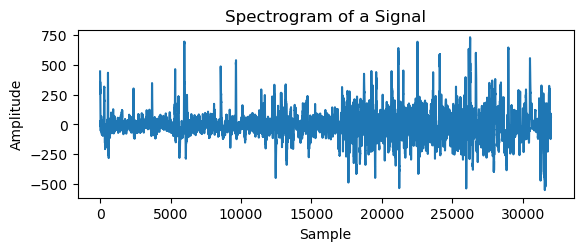

In [5]:
import pandas as pd

plot.subplot(211)
plot.title('Spectrogram of a Signal')

signal = pd.DataFrame(raw)
DF = pd.DataFrame({
    'S': signal.iloc[:,0]
})
plot.plot(DF.S)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


In [6]:
samplingFrequency = data['EEG'][0][0][4][0][0]  #- fix this path!

samplingFrequency

256

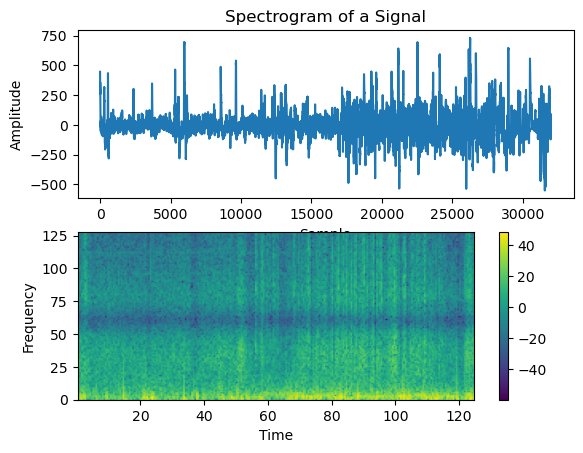

In [15]:
plot.subplot(211)
plot.title('Spectrogram of a Signal')

signal = pd.DataFrame(raw)
DF = pd.DataFrame({
    'S': signal.iloc[:,0]
})
plot.plot(DF.S)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

# Compute and plot a spectrogram of data in x. Data are split into NFFT length segments and the spectrum of each section is computed.
# The windowing function window is applied to each segment, and the amount of overlap of each segment is specified with noverlap. The spectrogram is plotted as a colormap (using imshow).
plot.subplot(212)
# Changing noverlap to be an integer using integer division //
plot.specgram(DF.S,Fs=samplingFrequency,NFFT=samplingFrequency, noverlap=(samplingFrequency//2))
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.colorbar()
plot.show()

## Explore the spectrogram and engineer features

In [17]:
# given DF , with a single column 'S' , and samplingFrequency, create a time axis in seconds for the signal
def time_axis(DF, samplingFrequency):
    return np.arange(0, len(DF)/samplingFrequency, 1/samplingFrequency)

DF['time'] = time_axis(DF, samplingFrequency)

DF.head()


S      time
0  445.616608  0.000000
1  438.192932  0.003906
2  410.842499  0.007812
3  387.008545  0.011719
4  374.114777  0.015625

In [18]:
# Split the time series into windows of size NFFT=samplingFrequency, with 50% overlap i.e. (samplingFrequency//2)). Do this by creating a column with the window number for each row of the signal.

import pandas as pd

def window_number(DF, samplingFrequency):
    window_size = samplingFrequency
    step_size = samplingFrequency // 2
    num_windows = (len(DF) - step_size) // step_size + 1
    
    windows = []
    for i in range(len(DF)):
        row_windows = []
        for j in range(num_windows):
            start_idx = j * step_size
            end_idx = start_idx + window_size
            if start_idx <= i < end_idx:
                row_windows.append(j)
        windows.append(row_windows)
    
    return windows

DF['window'] = window_number(DF, samplingFrequency)


In [22]:
# view the rows 256/2 to 256*2
# display all rows when printing in pandas
pd.set_option('display.max_rows', None)
DF.iloc[256//2-10:256*2]

S      time  window
118  -15.824176  0.460938     [0]
119  -30.280830  0.464844     [0]
120  -64.664223  0.468750     [0]
121  -73.260071  0.472656     [0]
122  -61.929180  0.476562     [0]
123  -49.816849  0.480469     [0]
124  -30.671551  0.484375     [0]
125  -12.698413  0.488281     [0]
126   -5.274725  0.492188     [0]
127  -38.095238  0.496094     [0]
128  -35.750916  0.500000  [0, 1]
129  -68.571426  0.503906  [0, 1]
130  -86.935287  0.507812  [0, 1]
131  -66.227104  0.511719  [0, 1]
132  -36.141636  0.515625  [0, 1]
133   -6.446887  0.519531  [0, 1]
134   16.214897  0.523438  [0, 1]
135   22.075703  0.527344  [0, 1]
136  -17.387058  0.531250  [0, 1]
137  -77.557999  0.535156  [0, 1]
138  -79.902321  0.539062  [0, 1]
139  -77.948715  0.542969  [0, 1]
140  -55.286934  0.546875  [0, 1]
141  -34.188034  0.550781  [0, 1]
142   -9.572650  0.554688  [0, 1]
143  -18.559219  0.558594  [0, 1]
144  -23.247864  0.562500  [0, 1]
145  -18.559219  0.566406  [0, 1]
146  -16.996338  0.570312  [0, 1]
147  -33.797314  0.574219  [0, 1]
148  -51.379730  0.578125  [0, 1]
149  -34.188034  0.582031  [0, 1]
150  -33.015873  0.585938  [0, 1]
151  -20.122101  0.589844  [0, 1]
152    6.837607  0.593750  [0, 1]
153    3.711844  0.597656  [0, 1]
154  -23.638584  0.601562  [0, 1]
155  -31.843712  0.605469  [0, 1]
156  -39.658119  0.609375  [0, 1]
157  -35.360195  0.613281  [0, 1]
158  -33.406593  0.617188  [0, 1]
159  -31.062271  0.621094  [0, 1]
160  -31.452991  0.625000  [0, 1]
161  -49.426128  0.628906  [0, 1]
162  -33.406593  0.632812  [0, 1]
163  -34.969475  0.636719  [0, 1]
164  -30.671551  0.640625  [0, 1]
165  -15.433455  0.644531  [0, 1]
166  -24.420025  0.648438  [0, 1]
167  -33.015873  0.652344  [0, 1]
168  -42.002441  0.656250  [0, 1]
169  -42.002441  0.660156  [0, 1]
170  -33.797314  0.664062  [0, 1]
171  -25.201466  0.667969  [0, 1]
172  -10.354091  0.671875  [0, 1]
173  -17.387058  0.675781  [0, 1]
174  -43.174603  0.679688  [0, 1]
175  -54.114773  0.683594  [0, 1]
176  -59.194138  0.687500  [0, 1]
177  -56.849815  0.691406  [0, 1]
178  -33.406593  0.695312  [0, 1]
179  -19.731380  0.699219  [0, 1]
180  -29.890110  0.703125  [0, 1]
181  -38.876678  0.707031  [0, 1]
182  -63.492062  0.710938  [0, 1]
183  -76.776558  0.714844  [0, 1]
184  -60.757019  0.718750  [0, 1]
185  -32.625153  0.722656  [0, 1]
186  -10.744811  0.726562  [0, 1]
187  -18.559219  0.730469  [0, 1]
188  -46.300365  0.734375  [0, 1]
189  -70.525032  0.738281  [0, 1]
190  -86.544563  0.742188  [0, 1]
191  -75.213676  0.746094  [0, 1]
192  -56.849815  0.750000  [0, 1]
193  -70.525032  0.753906  [0, 1]
194  -82.637360  0.757812  [0, 1]
195  -71.697189  0.761719  [0, 1]
196  -47.863247  0.765625  [0, 1]
197  -28.327229  0.769531  [0, 1]
198  -22.466423  0.773438  [0, 1]
199  -36.141636  0.777344  [0, 1]
200  -74.822952  0.781250  [0, 1]
201  -96.703300  0.785156  [0, 1]
202  -93.968254  0.789062  [0, 1]
203  -89.279610  0.792969  [0, 1]
204  -74.432236  0.796875  [0, 1]
205  -67.789986  0.800781  [0, 1]
206  -57.240536  0.804688  [0, 1]
207  -36.923077  0.808594  [0, 1]
208  -16.605618  0.812500  [0, 1]
209  -11.526252  0.816406  [0, 1]
210  -13.870574  0.820312  [0, 1]
211  -47.863247  0.824219  [0, 1]
212  -75.213676  0.828125  [0, 1]
213  -65.445663  0.832031  [0, 1]
214  -43.565323  0.835938  [0, 1]
215  -21.294262  0.839844  [0, 1]
216    2.148962  0.843750  [0, 1]
217   -9.963370  0.847656  [0, 1]
218  -37.704517  0.851562  [0, 1]
219  -53.724052  0.855469  [0, 1]
220  -40.830280  0.859375  [0, 1]
221  -31.062271  0.863281  [0, 1]
222   -3.321123  0.867188  [0, 1]
223    3.321123  0.871094  [0, 1]
224   12.307693  0.875000  [0, 1]
225   15.824176  0.878906  [0, 1]
226   21.684982  0.882812  [0, 1]
227   24.810745  0.886719  [0, 1]
228   -1.758242  0.890625  [0, 1]
229  -15.042735  0.894531  [0, 1]
230  -25.201466  0.898438  [0, 1]
231  -23.247864  0.902344  [0, 1]
232    5.274725  0.906250  [0, 1]
233    7.619048  0.910156  [0, 1]
234  -12.698413  0.914062  [0, 1]
23

In [24]:
# superimpose all the windows in a common time axis, since they are all of the same length in a plotly plot

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Assuming DF is your DataFrame and samplingFrequency is defined
def window_number(DF, samplingFrequency):
    window_size = samplingFrequency # window size is the same as NFFT
    step_size = samplingFrequency // 2  # 50% overlap
    num_windows = (len(DF) - step_size) // step_size + 1
    
    windows = []
    for i in range(len(DF)):
        row_windows = []
        for j in range(num_windows):
            start_idx = j * step_size
            end_idx = start_idx + window_size
            if start_idx <= i < end_idx:
                row_windows.append(j)
        windows.append(row_windows)
    
    return windows

DF['window'] = window_number(DF, samplingFrequency)

# Extract windows
window_size = samplingFrequency
step_size = samplingFrequency // 2
num_windows = (len(DF) - step_size) // step_size + 1

windows = []
for i in range(num_windows):
    start_idx = i * step_size
    end_idx = start_idx + window_size
    windows.append(DF.iloc[start_idx:end_idx])

# Create a common time axis
time_axis = np.arange(window_size) / samplingFrequency

# Plot using Plotly
fig = go.Figure()

for i, window in enumerate(windows):
    fig.add_trace(go.Scatter(x=time_axis, y=window['S'], mode='lines', name=f'Window {i}'))

fig.update_layout(title='Superimposed Windows on Common Time Axis',
                  xaxis_title='Time (s)',
                  yaxis_title='Signal',
                  showlegend=True)

fig.show()



## Lets engineer some frequency based features now

### Example of a spectrogram and what it means to compute power 

Text(0, 0.5, 'Amplitude')

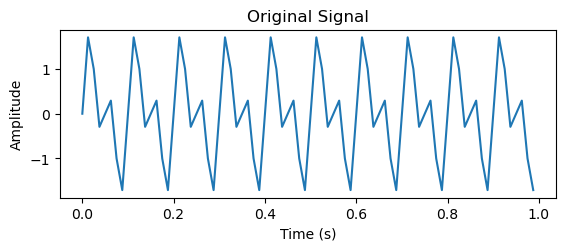

In [33]:
import numpy as np
import plotly.graph_objects as go
from scipy.signal import welch, get_window

def extract_features(segment, fs):
    window = get_window('hamming', fs)
    nfft = fs
    freq, psd = welch(segment, window=window, fs=fs, nfft=nfft)
    total_energy = np.trapz(psd, freq)
    
    delta_power = np.trapz(psd[(freq >= 1) & (freq < 4)]) / total_energy
    theta_power = np.trapz(psd[(freq >= 4) & (freq < 7)]) / total_energy
    alpha_power = np.trapz(psd[(freq >= 7) & (freq < 12)]) / total_energy
    beta_power = np.trapz(psd[(freq >= 12) & (freq < 20)]) / total_energy
    
    return freq, psd, [delta_power, theta_power, alpha_power, beta_power]

# Generate a sample signal
fs = 8  # Sampling frequency
t = np.linspace(0, 1, fs * 10, endpoint=False)  # 10 seconds of data
signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)  # Example signal with 10 Hz and 20 Hz components

# Extract features and get PSD
freq, psd, features = extract_features(signal, fs)

# Create the plot
fig = go.Figure()

# Plot the PSD
fig.add_trace(go.Scatter(x=freq, y=psd, mode='lines', name='PSD'))

# Highlight the frequency bands
bands = {
    'Delta (1-4 Hz)': (1, 4),
    'Theta (4-7 Hz)': (4, 7),
    'Alpha (7-12 Hz)': (7, 12),
    'Beta (12-20 Hz)': (12, 20)
}

for band_name, (band_start, band_end) in bands.items():
    band_mask = (freq >= band_start) & (freq < band_end)
    fig.add_trace(go.Scatter(
        x=freq[band_mask], y=psd[band_mask], mode='lines', name=band_name
    ))
    
# Update layout
fig.update_layout(
    title='Power Spectral Density with Frequency Bands',
    xaxis_title='Frequency (Hz)',
    yaxis_title='Power Spectral Density (PSD)',
    legend_title='Frequency Bands'
)

# Show the plot
fig.show()



# plot the original signal in a new plot
plot.subplot(211)
plot.title('Original Signal')
plot.plot(t, signal)
plot.xlabel('Time (s)')
plot.ylabel('Amplitude')


### Lets do the same for our original signal (EEG)

In [34]:
import numpy as np
import pandas as pd
from scipy.signal import welch, get_window
from sklearn.preprocessing import normalize

def extract_features(segment, fs):
    window = get_window('hamming', fs)
    nfft = fs
    freq, psd = welch(segment, window=window, fs=fs, nfft=nfft)
    total_energy = np.trapz(psd, freq)
    
    delta_power = np.trapz(psd[(freq >= 1) & (freq < 4)]) / total_energy
    theta_power = np.trapz(psd[(freq >= 4) & (freq < 7)]) / total_energy
    alpha_power = np.trapz(psd[(freq >= 7) & (freq < 12)]) / total_energy
    beta_power = np.trapz(psd[(freq >= 12) & (freq < 20)]) / total_energy
    
    return [delta_power, theta_power, alpha_power, beta_power]

def process_segments(raw, fs, label, start, end, segment_duration):
    segments = []
    step = fs * segment_duration
    for i in range(start, end):
        segment = raw[i * step:(i + 2) * step]
        features = extract_features(segment, fs)
        features.append(label)
        segments.append(features)
    return segments

# Assuming `data` and `raw` are defined
fs = samplingFrequency
segment_duration = 1  # Duration of each segment in seconds

# Calculate the number of segments
total_segments = len(raw) // (fs * segment_duration)
half_segments = total_segments // 2

##  Based on knowledge of the ground truth of seizure labels in the dataset, we can split the segments into seizure and non-seizure segments.
# Process non-seizure segments
non_seizure_segments = process_segments(raw, fs, label=0, start=0, end=half_segments, segment_duration=segment_duration)

# Process seizure segments
seizure_segments = process_segments(raw, fs, label=1, start=half_segments, end=total_segments, segment_duration=segment_duration)

# Combine segments
all_segments = non_seizure_segments + seizure_segments

# Convert to DataFrame
segments_df = pd.DataFrame(all_segments, columns=['delta', 'theta', 'alpha', 'beta', 'seizure'])

# Normalize the signal data (not the ground truth labels!)
segments_df[['delta', 'theta', 'alpha', 'beta']] = normalize(segments_df[['delta', 'theta', 'alpha', 'beta']])

# Convert seizure column to category
segments_df['seizure'] = segments_df['seizure'].astype('category')

# Display DataFrame info and value counts
print(segments_df.info(verbose=True))
print(segments_df['seizure'].value_counts())

# Display the first few rows
segments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   delta    125 non-null    float64 
 1   theta    125 non-null    float64 
 2   alpha    125 non-null    float64 
 3   beta     125 non-null    float64 
 4   seizure  125 non-null    category
dtypes: category(1), float64(4)
memory usage: 4.3 KB
None
seizure
1    63
0    62
Name: count, dtype: int64


delta     theta     alpha      beta seizure
0  0.995975  0.075758  0.043777  0.019427       0
1  0.992658  0.111096  0.044879  0.016525       0
2  0.993037  0.108308  0.040143  0.023155       0
3  0.763365  0.570391  0.243744  0.180323       0
4  0.864663  0.453227  0.206527  0.065492       0

In [35]:
segments_df.to_csv('segments_fs_width_50pct_overlap_DTAB_GT.csv', index=False)

## Now lets do some EDA on segments_df to compare seizure and non-seizure data for each feature

In [36]:
# make plotly boxplots grouped by seizure column
import plotly.express as px

fig = px.box(segments_df, x='seizure', y='delta', points='all', title='Delta Power Distribution by Seizure Status')
fig.show()

fig = px.box(segments_df, x='seizure', y='theta', points='all', title='Theta Power Distribution by Seizure Status')
fig.show()

fig = px.box(segments_df, x='seizure', y='alpha', points='all', title='Alpha Power Distribution by Seizure Status')
fig.show()

fig = px.box(segments_df, x='seizure', y='beta', points='all', title='Beta Power Distribution by Seizure Status')
fig.show()

In [38]:
# Lets get non-parametric Mann-Whitney U test results for each feature comparing seizure and non-seizure segments

from scipy.stats import mannwhitneyu
import pandas as pd

def mannwhitneyu_test(df, feature):
    seizure = df[df['seizure'] == 1][feature]
    non_seizure = df[df['seizure'] == 0][feature]
    
    if len(seizure) == 0 or len(non_seizure) == 0:
        raise ValueError(f"One of the groups for feature '{feature}' has no observations.")
    
    stat, p = mannwhitneyu(seizure, non_seizure)
    return stat, p

features = ['delta', 'theta', 'alpha', 'beta']
results = {feature: mannwhitneyu_test(segments_df, feature) for feature in features}

results_df = pd.DataFrame(results, index=['statistic', 'p-value'])
results_df

delta        theta       alpha          beta
statistic  2390.000000  1686.000000  984.000000  9.190000e+02
p-value       0.031132     0.188194    0.000002  3.338100e-07

In [39]:
# Lets get unpaired t-test results for each feature comparing seizure and non-seizure segments

from scipy.stats import ttest_ind
import pandas as pd

def ttest_ind_test(df, feature):
    seizure = df[df['seizure'] == 1][feature]
    non_seizure = df[df['seizure'] == 0][feature]
    
    if len(seizure) == 0 or len(non_seizure) == 0:
        raise ValueError(f"One of the groups for feature '{feature}' has no observations.")
    
    stat, p = ttest_ind(seizure, non_seizure, equal_var=False)
    return stat, p

features = ['delta', 'theta', 'alpha', 'beta']
results = {feature: ttest_ind_test(segments_df, feature) for feature in features}

results_df = pd.DataFrame(results, index=['statistic', 'p-value'])
results_df

delta     theta     alpha      beta
statistic  1.853863 -1.307449 -4.907429 -5.105461
p-value    0.066687  0.193591  0.000005  0.000003